<img src="https://raw.githubusercontent.com/DHI/tsod/main/images/logo/tsod.png" alt="image" width="250">

# Example 3 - Anomaly Detection for time series data.

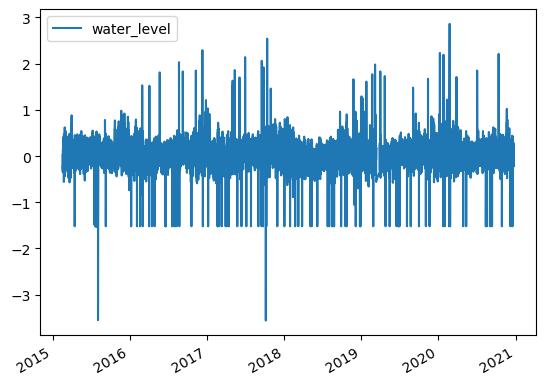

In [1]:
# Read water level sensor from csv

import pandas as pd

file_path = "./data/dirty_data.csv"
df = pd.read_csv(file_path, index_col=0, parse_dates=True)
df.plot();

In [2]:
# Detect anomalies outside defined range

from tsod import RangeDetector

detector = RangeDetector(-1,1)
detector.detect(df)

,water_level
2015-02-18 12:30:00,False
2015-02-18 12:40:00,False
2015-02-18 12:50:00,False
2015-02-18 13:00:00,False
2015-02-18 13:10:00,False
...,...
2020-12-22 11:40:00,False
2020-12-22 11:50:00,False
2020-12-22 12:00:00,False
2020-12-22 12:10:00,False


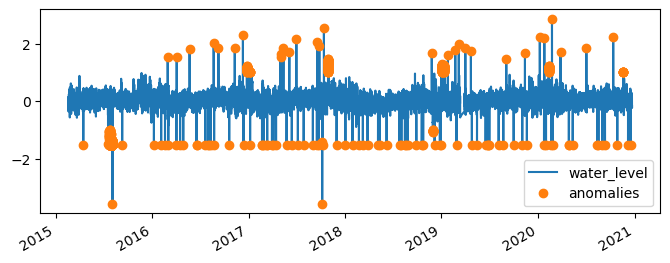

In [3]:
# Plot anomalies

detected = df.copy()
detected["anomalies"] = detected[detector.detect(df)]
detected.plot(style=['-', 'o'], figsize=(8,3));

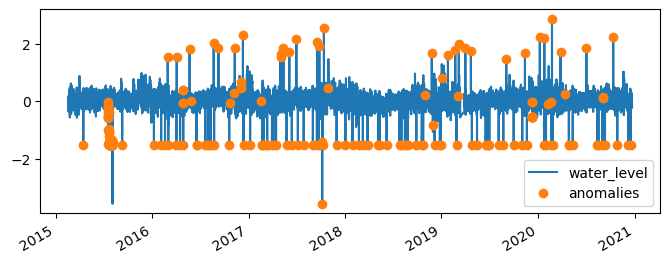

In [4]:
# Detect anomalies with a different algorithm

from tsod.hampel import HampelDetector

detector = HampelDetector(window_size=20, threshold=3)
detected = df.copy()
detected["anomalies"] = detected[detector.detect(df["water_level"])]
detected.plot(style=['-', 'o'], figsize=(8,3));


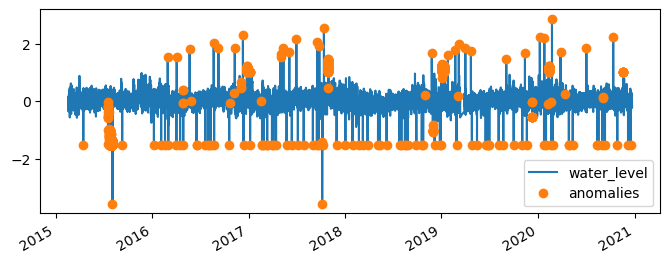

In [5]:
# Combine different algorithms

from tsod import CombinedDetector

detector = CombinedDetector([
    HampelDetector(window_size=20, threshold=3),
    RangeDetector(-1,1),
])
detected = df.copy()
detector.detect(df["water_level"])
detected["anomalies"] = detected[detector.detect(df["water_level"]).values]
detected.plot(style=['-', 'o'], figsize=(8,3));

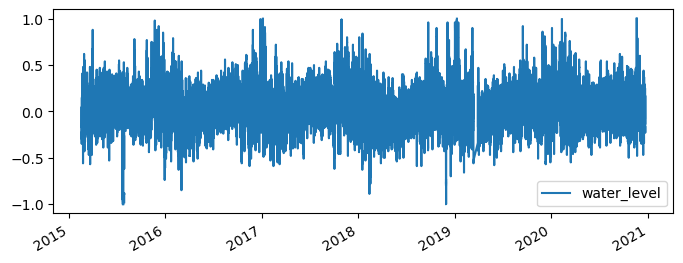

In [6]:
# Remove the anomalies

import numpy as np

df_clean = df.copy()
anomalies = detector.detect(df["water_level"]).values
df_clean[anomalies] = np.nan
df_clean.plot(figsize=(8,3));

In [7]:
# Save to dfs0 file

import mikeio

df_clean.to_dfs0("cleaned_data.dfs0")